In [26]:
# !pip install -U byaldi pdf2image qwen-vl-utils transformers
# run the above in the terminal

In [27]:
# brew install poppler
!pdftoppm -v
import subprocess
result = subprocess.run(['pdftoppm', '-v'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(result.stdout.decode())
print(result.stderr.decode())


pdftoppm version 25.08.0
Copyright 2005-2025 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011, 2022 Glyph & Cog, LLC


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



pdftoppm version 25.08.0
Copyright 2005-2025 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011, 2022 Glyph & Cog, LLC



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [3]:
import os

# map each product name to its local PDF path
pdfs = {
    "MALM":   os.path.join("data", "MALM.pdf"),
    "BILLY":  os.path.join("data", "BILLY.pdf"),
    "BOAXEL": os.path.join("data", "BOAXEL.pdf"),
    "ADILS":  os.path.join("data", "ADILS.pdf"),
    "MICKE":  os.path.join("data", "MICKE.pdf"),
}

# check they all exist
for name, path in pdfs.items():
    if not os.path.isfile(path):
        raise FileNotFoundError(f"{name} PDF not found at {path}")
    print(f"Found {name} at {path}")

# now you can feed those paths directly into pdf2image, byaldi, etc.
# e.g.:
from pdf2image import convert_from_path

all_images = {}
for doc_id, (name, pdf_path) in enumerate(pdfs.items()):
    pages = convert_from_path(pdf_path)
    all_images[doc_id] = pages
    print(f"{name}: {len(pages)} pages converted")

Found MALM at data/MALM.pdf
Found BILLY at data/BILLY.pdf
Found BOAXEL at data/BOAXEL.pdf
Found ADILS at data/ADILS.pdf
Found MICKE at data/MICKE.pdf
MALM: 28 pages converted
BILLY: 16 pages converted
BOAXEL: 20 pages converted
ADILS: 8 pages converted
MICKE: 24 pages converted


In [4]:
import os
from pdf2image import convert_from_path


def convert_pdfs_to_images(pdf_folder):
    pdf_files = [f for f in os.listdir(pdf_folder) if f.endswith(".pdf")]
    all_images = {}

    for doc_id, pdf_file in enumerate(pdf_files):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        images = convert_from_path(pdf_path)
        all_images[doc_id] = images

    return all_images


all_images = convert_pdfs_to_images("data/")

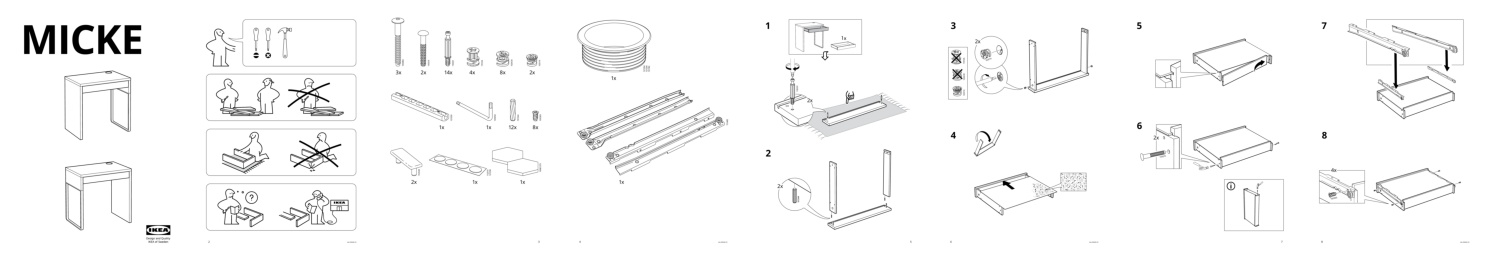

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 8, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    img = all_images[0][i]
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [8]:
# from byaldi import RAGMultiModalModel

# docs_retrieval_model = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2")

import torch
from byaldi import RAGMultiModalModel

device = "mps" if torch.backends.mps.is_available() else "cpu"
print("Loading on", device)

docs_retrieval_model = RAGMultiModalModel.from_pretrained(
    "vidore/colpali-v1.2",
    device=device
)

Loading on mps
Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [9]:
docs_retrieval_model.index(
    input_path="data/", index_name="image_index", store_collection_with_index=False, overwrite=True
)

overwrite is on. Deleting existing index image_index to build a new one.
Indexing file: data/MICKE.pdf
Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Added page 21 of document 0 to index.
Added page 22 of document 0 to index.
Added page 23 of document 0 to index.
Added page 24 of document 0 to i

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Added page 1 of document 1 to index.
Added page 2 of document 1 to index.
Added page 3 of document 1 to index.
Added page 4 of document 1 to index.
Added page 5 of document 1 to index.
Added page 6 of document 1 to index.
Added page 7 of document 1 to index.
Added page 8 of document 1 to index.
Added page 9 of document 1 to index.
Added page 10 of document 1 to index.
Added page 11 of document 1 to index.
Added page 12 of document 1 to index.
Added page 13 of document 1 to index.
Added page 14 of document 1 to index.
Added page 15 of document 1 to index.
Added page 16 of document 1 to index.
Added page 17 of document 1 to index.
Added page 18 of document 1 to index.
Added page 19 of document 1 to index.
Added page 20 of document 1 to index.
Index exported to .byaldi/image_index
Indexing file: data/ADILS.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Added page 1 of document 2 to index.
Added page 2 of document 2 to index.
Added page 3 of document 2 to index.
Added page 4 of document 2 to index.
Added page 5 of document 2 to index.
Added page 6 of document 2 to index.
Added page 7 of document 2 to index.
Added page 8 of document 2 to index.
Index exported to .byaldi/image_index
Indexing file: data/MALM.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Added page 1 of document 3 to index.
Added page 2 of document 3 to index.
Added page 3 of document 3 to index.
Added page 4 of document 3 to index.
Added page 5 of document 3 to index.
Added page 6 of document 3 to index.
Added page 7 of document 3 to index.
Added page 8 of document 3 to index.
Added page 9 of document 3 to index.
Added page 10 of document 3 to index.
Added page 11 of document 3 to index.
Added page 12 of document 3 to index.
Added page 13 of document 3 to index.
Added page 14 of document 3 to index.
Added page 15 of document 3 to index.
Added page 16 of document 3 to index.
Added page 17 of document 3 to index.
Added page 18 of document 3 to index.
Added page 19 of document 3 to index.
Added page 20 of document 3 to index.
Added page 21 of document 3 to index.
Added page 22 of document 3 to index.
Added page 23 of document 3 to index.
Added page 24 of document 3 to index.
Added page 25 of document 3 to index.
Added page 26 of document 3 to index.
Added page 27 of docu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Added page 1 of document 4 to index.
Added page 2 of document 4 to index.
Added page 3 of document 4 to index.
Added page 4 of document 4 to index.
Added page 5 of document 4 to index.
Added page 6 of document 4 to index.
Added page 7 of document 4 to index.
Added page 8 of document 4 to index.
Added page 9 of document 4 to index.
Added page 10 of document 4 to index.
Added page 11 of document 4 to index.
Added page 12 of document 4 to index.
Added page 13 of document 4 to index.
Added page 14 of document 4 to index.
Added page 15 of document 4 to index.
Added page 16 of document 4 to index.
Index exported to .byaldi/image_index
Index exported to .byaldi/image_index


{0: 'data/MICKE.pdf',
 1: 'data/BOAXEL.pdf',
 2: 'data/ADILS.pdf',
 3: 'data/MALM.pdf',
 4: 'data/BILLY.pdf'}

In [10]:
text_query = "How many people are needed to assemble the Malm?"

results = docs_retrieval_model.search(text_query, k=3)
results

[{'doc_id': 3, 'page_num': 1, 'score': 14.0625, 'metadata': {}, 'base64': None},
 {'doc_id': 3, 'page_num': 3, 'score': 11.5, 'metadata': {}, 'base64': None},
 {'doc_id': 0, 'page_num': 19, 'score': 11.125, 'metadata': {}, 'base64': None}]

In [11]:
def get_grouped_images(results, all_images):
    grouped_images = []

    for result in results:
        doc_id = result["doc_id"]
        page_num = result["page_num"]
        grouped_images.append(
            all_images[doc_id][page_num - 1]
        )  # page_num are 1-indexed, while doc_ids are 0-indexed. Source https://github.com/AnswerDotAI/byaldi?tab=readme-ov-file#searching

    return grouped_images


grouped_images = get_grouped_images(results, all_images)

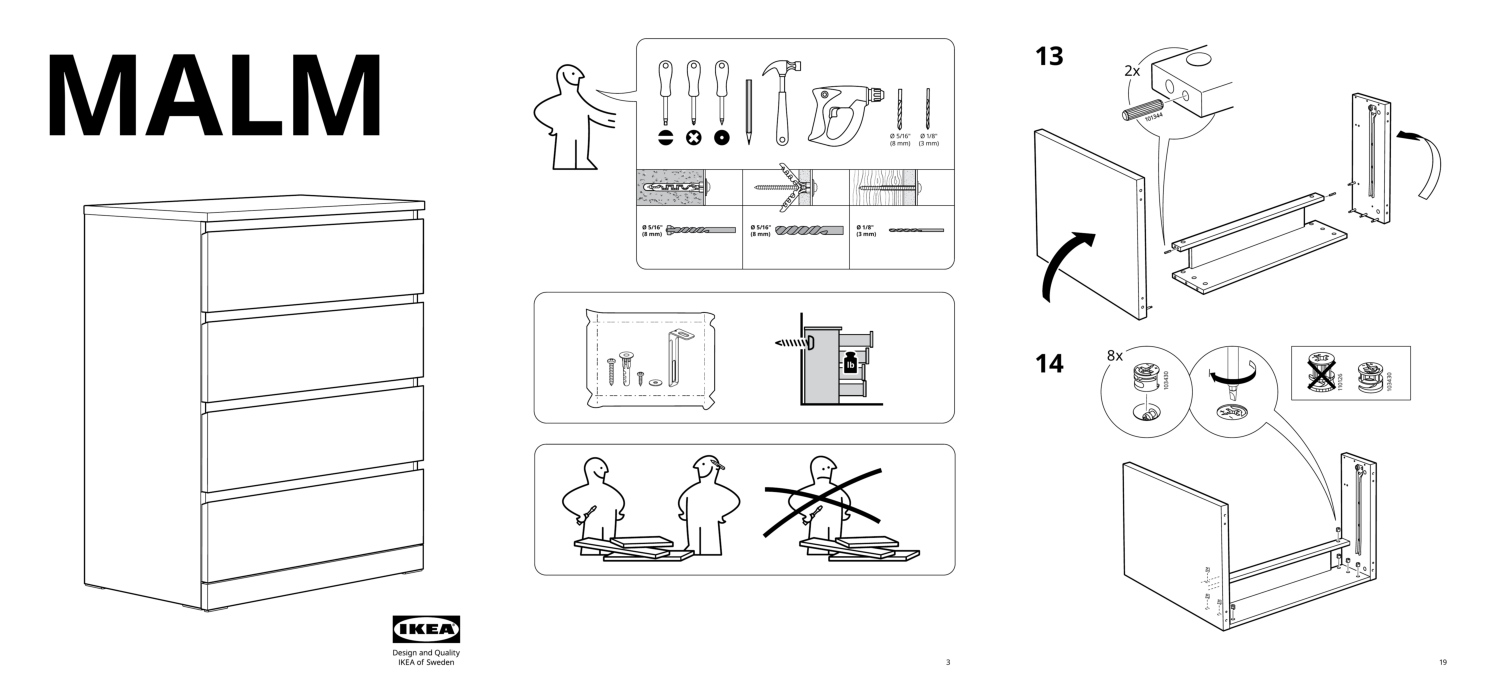

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    img = grouped_images[i]
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [13]:
from transformers import Qwen2VLForConditionalGeneration, Qwen2VLProcessor
from qwen_vl_utils import process_vision_info
import torch

vl_model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct",
    torch_dtype=torch.bfloat16,
)
# vl_model.cuda().eval()

if torch.backends.mps.is_available():                      # Apple Silicon (M1/M2) Metal support
    device = torch.device("mps")
else:
    device = torch.device("cpu")

vl_model.to(device).eval()

Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00,  7.34it/s]


Qwen2VLForConditionalGeneration(
  (model): Qwen2VLModel(
    (visual): Qwen2VisionTransformerPretrainedModel(
      (patch_embed): PatchEmbed(
        (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
      )
      (rotary_pos_emb): VisionRotaryEmbedding()
      (blocks): ModuleList(
        (0-31): 32 x Qwen2VLVisionBlock(
          (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
          (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
          (attn): VisionAttention(
            (qkv): Linear(in_features=1280, out_features=3840, bias=True)
            (proj): Linear(in_features=1280, out_features=1280, bias=True)
          )
          (mlp): VisionMlp(
            (fc1): Linear(in_features=1280, out_features=5120, bias=True)
            (act): QuickGELUActivation()
            (fc2): Linear(in_features=5120, out_features=1280, bias=True)
          )
        )
      )
      (merger): PatchMerger(
        (ln_q): LayerN

In [14]:
min_pixels = 224 * 224
max_pixels = 1024 * 1024
vl_model_processor = Qwen2VLProcessor.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels
)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


In [15]:
chat_template = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": grouped_images[0],
            },
            {
                "type": "image",
                "image": grouped_images[1],
            },
            {
                "type": "image",
                "image": grouped_images[2],
            },
            {"type": "text", "text": text_query},
        ],
    }
]

In [16]:
text = vl_model_processor.apply_chat_template(chat_template, tokenize=False, add_generation_prompt=True)

In [18]:
import torch

# pick the right device
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():   # Apple M1/M2 Metal support
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# …later, after you’ve created your `inputs` dict:
inputs = vl_model_processor(
    text=[text],
    images=image_inputs,
    padding=True,
    return_tensors="pt",
)

# move everything to the chosen device
# BatchEncoding supports .to(), but if yours is a plain dict you can do:
inputs = {k: v.to(device) for k, v in inputs.items()}

# and make sure your model is on the same device:
vl_model.to(device).eval()

Qwen2VLForConditionalGeneration(
  (model): Qwen2VLModel(
    (visual): Qwen2VisionTransformerPretrainedModel(
      (patch_embed): PatchEmbed(
        (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
      )
      (rotary_pos_emb): VisionRotaryEmbedding()
      (blocks): ModuleList(
        (0-31): 32 x Qwen2VLVisionBlock(
          (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
          (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
          (attn): VisionAttention(
            (qkv): Linear(in_features=1280, out_features=3840, bias=True)
            (proj): Linear(in_features=1280, out_features=1280, bias=True)
          )
          (mlp): VisionMlp(
            (fc1): Linear(in_features=1280, out_features=5120, bias=True)
            (act): QuickGELUActivation()
            (fc2): Linear(in_features=5120, out_features=1280, bias=True)
          )
        )
      )
      (merger): PatchMerger(
        (ln_q): LayerN

In [19]:
generated_ids = vl_model.generate(**inputs, max_new_tokens=500)

In [21]:
# Strip off the prompt tokens from each sequence
generated_ids_trimmed = [
    out_ids[len(in_ids):]
    for in_ids, out_ids in zip(inputs["input_ids"], generated_ids)
]

# Decode the model’s answer
output_text = vl_model_processor.batch_decode(
    generated_ids_trimmed,
    skip_special_tokens=True,
    clean_up_tokenization_spaces=False
)

In [22]:
print(output_text[0])

The image shows that two people are needed to assemble the Malm.


In [23]:
import torch
from qwen_vl_utils import process_vision_info

def answer_with_multimodal_rag(
    vl_model,
    docs_retrieval_model,
    vl_model_processor,
    all_images,
    text_query,
    top_k=3,
    max_new_tokens=200,
):
    # 1) pick the right device
    if torch.cuda.is_available():
        device = torch.device("cuda")
    elif torch.backends.mps.is_available():  # Apple M1/M2 Metal support
        device = torch.device("mps")
    else:
        device = torch.device("cpu")
    print(f"[INFO] running on {device}")

    # 2) ensure the VL model is on that device
    vl_model.to(device).eval()

    # 3) retrieve the top-K pages
    results = docs_retrieval_model.search(text_query, k=top_k)
    grouped_images = get_grouped_images(results, all_images)

    # 4) build the chat template
    chat_template = [
        {
            "role": "user",
            "content": (
                [{"type": "image", "image": img} for img in grouped_images]
                + [{"type": "text",  "text": text_query}]
            )
        }
    ]

    # 5) tokenize text + process images
    text = vl_model_processor.apply_chat_template(
        chat_template,
        tokenize=False,
        add_generation_prompt=True
    )
    image_inputs, _ = process_vision_info(chat_template)
    inputs = vl_model_processor(
        text=[text],
        images=image_inputs,
        padding=True,
        return_tensors="pt"
    )

    # 6) move all tensor inputs to the chosen device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # 7) generate and decode
    generated_ids = vl_model.generate(**inputs, max_new_tokens=max_new_tokens)
    # strip off the prompt tokens
    trimmed = [
        out_ids[len(in_ids):]
        for in_ids, out_ids in zip(inputs["input_ids"], generated_ids)
    ]
    output = vl_model_processor.batch_decode(
        trimmed,
        skip_special_tokens=True,
        clean_up_tokenization_spaces=False
    )

    return output

In [25]:
output_text = answer_with_multimodal_rag(
    vl_model=vl_model,
    docs_retrieval_model=docs_retrieval_model,
    vl_model_processor=vl_model_processor,
    all_images=all_images,                       # <— pass the full images dict
    text_query="How do I assemble the Micke desk?",
    top_k=3,
    max_new_tokens=500,
)
print(output_text[0])

[INFO] running on mps
To assemble the Micke desk, follow these steps:

1. **Prepare the Components**: Ensure you have all the necessary components, including the desk top, legs, and any other parts that come with the desk.

2. **Attach the Legs**: Place the legs on the bottom of the desk top. Make sure they are positioned correctly and aligned with the holes in the desk top.

3. **Secure the Legs**: Use the provided screws to attach the legs securely to the desk top. Ensure the screws are tight to ensure stability.

4. **Final Adjustments**: Once the legs are attached, make any final adjustments to ensure the desk is level and stable.

Refer to the provided instructions for any additional steps or specific details that may be required for your specific desk model.
